## Tensor(Pytorch)

#### 해당 코드는 google colab의 환경에서 이용하여 작성하였습니다.
#### 포스팅 내용과 동일한 결과를 얻기 위해서는 google colab에서 진행해 주시길 바랍니다.

### Tensor란?

텐서란 다차원 배열을 일반화해서 표현하는 개념입니다. 

우리는 보통 1차원의 숫자로 이루어진 데이터를 벡터, 2차원의 데이터를 행렬이라고 얘기하죠.

텐서는 이런 벡터, 행렬을 포함하여 다차원의 숫자로 이루어진 데이터를 말합니다.

다음시간에 구체적으로 얘기하겠지만, 딥러닝에서 주로 사용되는 연산들은 큰 데이터(ex: 224x224x3)에 대해 더하기, 곱하기와 같이 단순한 계산들 입니다.

그러나 이 시행횟수가 매우 많기 때문에 딥러닝을 계산하는 데에 오래 걸리게 되고, GPU와 같이 가속장치들과 연동이 되는 tensor를 주로 많이 이용하게 됩니다.

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

### Pytorch 속도 비교

다음 예시를 통해 numpy array와 torch와의 연산 속도를 비교해보겠습니다.

In [2]:
size = 1000
a = np.random.rand(size, size) # size * size의 행렬 생성.
b = np.random.rand(size, size)

start = time.time()

x = np.dot(a,b) # 두 600*600 행렬의 행렬곱 계산에 약 1.340s 소요.
print("넘파이 연산 속도:",time.time() - start)

넘파이 연산 속도: 0.16089868545532227


In [3]:
aa = torch.FloatTensor(a)
bb = torch.FloatTensor(b)

start = time.time()

cc = torch.matmul(aa, bb)
print("파이토치 연산 속도(CPU):",time.time() - start)

파이토치 연산 속도(CPU): 0.10666918754577637


In [4]:
aaa = torch.cuda.FloatTensor(a)
bbb = torch.cuda.FloatTensor(b)

start = time.time()

ccc = torch.matmul(aaa, bbb)
print("토치 연산 속도(GPU):",time.time() - start)

토치 연산 속도(GPU): 0.059679508209228516


물론 numpy 만으로도 3차원 이상의 데이터를 표현할 수 있지만, pytorch에서는 딥러닝에서 자주 쓰이는 모듈들은 이들을 텐서 형태로 정의하고 이들을 효율적으로 다룰 수 있는 프레임워크를 제공하고 있습니다.

### Tensor 생성

Tensor의 기본 구조는 Numpy와 동일합니다.

numpy array를 tensor로 변환할 수 있고, 반대로 tensor에서 numpy array로 변환할 수 있습니다.

In [11]:
x = np.array([[1,2,3],[4,5,6]], dtype=int) ## numpy array
x_tensor = torch.from_numpy(x)             ## numpy to tensor
print(x_tensor, x_tensor.type())
x_numpy = x_tensor.numpy()                 ## tensor to numpy
print(x_numpy)

tensor([[1, 2, 3],
        [4, 5, 6]]) torch.LongTensor
[[1 2 3]
 [4 5 6]]


In [12]:
x_float = torch.FloatTensor(x)
print(x_float, x_float.type())

tensor([[1., 2., 3.],
        [4., 5., 6.]]) torch.FloatTensor


그 외에도 여러가지 난수들을 생성할 수 있습니다.

In [10]:
x = torch.rand(2,3)
x.shape

torch.Size([2, 3])

In [ ]:
torch.randn(2,3)
torch.zeros(2,3)
torch.ones(2,3)

torch는 .device, 혹은 .cuda()를 이용하여 gpu에 할당할 수 있습니다.

In [18]:
cpu = torch.device('cpu')
gpu = torch.device('cuda')
x_float.to(gpu)             ## GPU에 할당
x_float.to(cpu)             ## CPU에 할당

tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')

### Tensor 연산

Tensor의 연산을 해봅시다. 기본적인 방법은 numpy와 동일합니다.

In [13]:
x = torch.FloatTensor([[1,2,3],[4,5,6]])
y = torch.FloatTensor([[-1,-2,-3],[-4,-5,-6]])

In [19]:
torch.add(x,y) ## x+y
torch.mul(x,y) ## x*y
torch.div(x,y) ## x/y
torch.pow(x,2) ## x**2

tensor([[ 1.,  4.,  9.],
        [16., 25., 36.]])

In [24]:
torch.mm(x,y.T) ## 행렬곱
torch.log(x)    ## log(x)
torch.exp(x)    ## exp(x)

tensor([[  2.7183,   7.3891,  20.0855],
        [ 54.5981, 148.4132, 403.4288]])

### Tensor 변환

Tensor는 형 변환이 자유롭습니다.

불필요한 차원을 줄이거나 새로운 차원을 추가를 하는 것도 가능합니다.

In [38]:
x1 = torch.FloatTensor(1,32,32)
x2 = torch.squeeze(x1)  # torch.Size[(32, 32)]

x1.size(),x2.size()

(torch.Size([1, 32, 32]), torch.Size([32, 32]))

In [39]:
x1 = torch.FloatTensor(32,32)
x2 = torch.unsqueeze(x1, dim=0)
print(x1.size(),x2.size()) # torch.Size([32, 32]) torch.Size([1, 32, 32])
x3 = torch.unsqueeze(x1, dim=1)
print(x1.size(),x3.size()) # torch.Size([32, 32]) torch.Size([32, 1, 32])

torch.Size([32, 32]) torch.Size([1, 32, 32])
torch.Size([32, 32]) torch.Size([32, 1, 32])


또한, 두개의 텐서를 결합하기도 하고 하나의 텐서를 두개의 텐서로 나누는 것도 가능합니다.

In [49]:
x = torch.FloatTensor([[1,2,3],[4,5,6]])
y = torch.FloatTensor([[-1,-2,-3],[-4,-5,-6]])
xy1 = torch.cat([x,y], dim = 0)  # 0번째에 결합
xy2 = torch.cat([x,y], dim = 1)  # 1번째에 결합
print(x.size(), y.size(), xy1.size(), xy2.size())

torch.Size([2, 3]) torch.Size([2, 3]) torch.Size([4, 3]) torch.Size([2, 6])


In [53]:
x1,x2 = torch.split(xy1,2,dim=0)
print(x1)
print(x2)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[-1., -2., -3.],
        [-4., -5., -6.]])


In [54]:
x1,x2 = torch.split(xy1,2,dim=1)
print(x1)
print(x2)

tensor([[ 1.,  2.],
        [ 4.,  5.],
        [-1., -2.],
        [-4., -5.]])
tensor([[ 3.],
        [ 6.],
        [-3.],
        [-6.]])


### Pytorch 이미지 불러오기

이번에는 torch에서 모델에 학습하기 위한 이미지를 불러오는 과정을 학습해 보겠습니다.

다음은 구글에서 제공하는 5종의 꽃의 이미지가 담긴 데이터셋입니다. 이를 모델에 훈련시킬 수 있는 데이터셋으로 전처리 하는 과정을 진행해 보겠습니다.

In [ ]:
import tensorflow as tf
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True,
                                   )
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 1s 0us/step


In [ ]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from torchvision.transforms import transforms as T
t = T.Compose([T.Resize((224,224)),T.ToTensor()])
dataset = ImageFolder(root = data_dir,transform = t)

torch.Size([3, 224, 224])

이때 주의해야 할 점이, numpy의 경우 h,w,c의 순서대로 shape가 출력되지만 torch에서는 c,h,w 순으로 출력됩니다.

In [ ]:
dataset[0][0].shape ## c,h,w로 바뀜

torch.Size([3, 224, 224])

In [ ]:
train_size = int(dataset.__len__() * 0.8)
valid_size = dataset.__len__() - train_size

training_data, valid_data = random_split(dataset, [train_size, valid_size])

train_dataloader = DataLoader(training_data, batch_size=16, shuffle=True)
valid_dataloader = DataLoader(valid_data, batch_size=16, shuffle=False)

위의 이미지들은 한번에 부를 때 batch_size만큼 불러올 수 있습니다.
다음은 하나의 batch_size만큼의 데이터를 시각화 해보겠습니다.


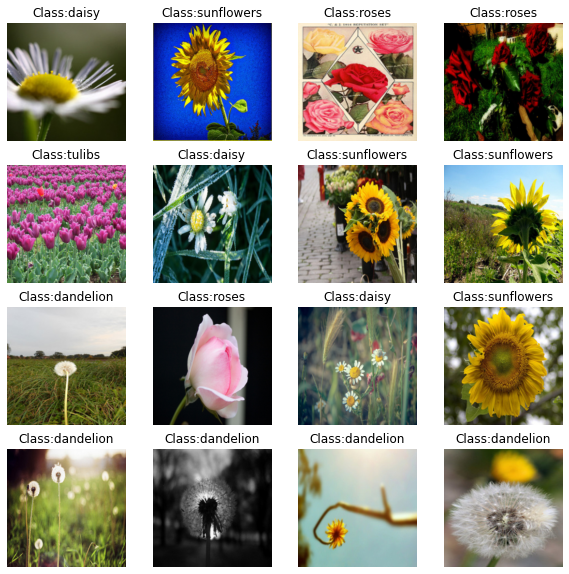

In [ ]:
class_names = ['daisy','dandelion','roses','sunflowers','tulibs']
plt.figure(figsize=(10, 10))
images, labels = next(iter(train_dataloader))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  img = images[i]
  img = (img - img.min())/(img.max() - img.min())
  plt.imshow(img.permute(1, 2, 0).numpy())
  plt.title(f'Class:{class_names[labels[i]]}')
  plt.axis("off")